# The Big Data Challenge

# Import packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import requests
from glob import glob
import os

# Stringency data by country

In [35]:
# Read in stringency data
file = (
    "Big Data Challenge_ Data and Challenge Statements/Data/Stringency data/OxCGRT_latest_hackathon.csv"
)
stringency = pd.read_csv(file, parse_dates=['Date'], usecols=['CountryName', 'Date', 
                                                              'StringencyIndex', 'StringencyIndexForDisplay', 'ConfirmedCases',
                                                             'ConfirmedDeaths'])
print(stringency.head())

  CountryName       Date  ConfirmedCases  ConfirmedDeaths  StringencyIndex  \
0       Aruba 2020-01-01             NaN              NaN              0.0   
1       Aruba 2020-01-02             NaN              NaN              0.0   
2       Aruba 2020-01-03             NaN              NaN              0.0   
3       Aruba 2020-01-04             NaN              NaN              0.0   
4       Aruba 2020-01-05             NaN              NaN              0.0   

   StringencyIndexForDisplay  
0                        0.0  
1                        0.0  
2                        0.0  
3                        0.0  
4                        0.0  


In [36]:
# Check for missing values
print(stringency.isna().sum())

CountryName                      0
Date                             0
ConfirmedCases               10426
ConfirmedDeaths              10426
StringencyIndex               1382
StringencyIndexForDisplay      454
dtype: int64


## Reformat data

In [37]:
# # Create new columns with Year and Month
# stringency.loc[:,'Year'] = stringency.loc[:,'Date'].dt.year
# stringency.loc[:,'Month'] = stringency.loc[:,'Date'].dt.month_name()
# stringency.loc[:,'day'] = stringency.loc[:,'Date'].dt.day
# print(stringency.head())


# Electricity data for the UK

In [38]:
# Read in electricity data
file3 = ("Big Data Challenge_ Data and Challenge Statements/Data/Electricity data/ET_5.5_AUG_20.xls")

electricity = pd.read_excel(file3, sheet_name='Month', usecols=['YEAR', 'MONTH', 'electricity '], header=[7], skiprows= [i for i in range(8, 273) ])
print(electricity)

                       YEAR      MONTH  electricity 
0                      2017    January     29.860327
1                      2017   February     26.207024
2                      2017      March     26.369292
3                      2017      April     24.043366
4                      2017        May     24.157889
5                      2017       June     22.589158
6                      2017       July     23.254473
7                      2017     August     23.576351
8                      2017  September     23.683497
9                      2017    October     25.338122
10                     2017   November     27.786430
11                     2017   December     29.302651
12                     2018    January     28.582218
13                     2018   February     27.061782
14                     2018      March     29.225837
15                     2018      April     25.640237
16                     2018        May     23.697955
17                     2018       June     22.

In [39]:
# Rename electicity column
electricity = electricity.rename(columns={'electricity ':'Total consumption of electricity used (all providers) TWh', 'YEAR':'Year', 'MONTH':'Month'})
print(electricity.head())

   Year     Month  Total consumption of electricity used (all providers) TWh
0  2017   January                                          29.860327        
1  2017  February                                          26.207024        
2  2017     March                                          26.369292        
3  2017     April                                          24.043366        
4  2017       May                                          24.157889        


In [40]:
# Remove rows containing nan in a specific column
electricity = electricity[pd.notnull(electricity['Month'])]

In [41]:
# Check for missing values
print(electricity.isna().sum())

Year                                                         0
Month                                                        0
Total consumption of electricity used (all providers) TWh    0
dtype: int64


In [42]:
## Create a date column so that we can merge on date - use 15th just as median date 
## NOTE THIS IS NOT A REAL DATE, only MONTH AND YEAR are correct
electricity['day'] = '15'
# Combine day, month and year of birth into one column
electricity['Date'] =  electricity['Year'].astype(str).str.zfill(4) + "-" + electricity['Month'].astype(str).str.zfill(2) + "-" + electricity['day'].astype(str).str.zfill(2)
# Convert date of birth column into datetime
electricity['Date'] = electricity['Date'].astype('datetime64[ns]')

print(electricity['Date'])


0    2017-01-15
1    2017-02-15
2    2017-03-15
3    2017-04-15
4    2017-05-15
5    2017-06-15
6    2017-07-15
7    2017-08-15
8    2017-09-15
9    2017-10-15
10   2017-11-15
11   2017-12-15
12   2018-01-15
13   2018-02-15
14   2018-03-15
15   2018-04-15
16   2018-05-15
17   2018-06-15
18   2018-07-15
19   2018-08-15
20   2018-09-15
21   2018-10-15
22   2018-11-15
23   2018-12-15
24   2019-01-15
25   2019-02-15
26   2019-03-15
27   2019-04-15
28   2019-05-15
29   2019-06-15
30   2019-07-15
31   2019-08-15
32   2019-09-15
33   2019-10-15
34   2019-11-15
35   2019-12-15
36   2020-01-15
37   2020-02-15
38   2020-03-15
39   2020-04-15
40   2020-05-15
41   2020-06-15
Name: Date, dtype: datetime64[ns]


In [43]:
stringency.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42920 entries, 0 to 42919
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   CountryName                42920 non-null  object        
 1   Date                       42920 non-null  datetime64[ns]
 2   ConfirmedCases             32494 non-null  float64       
 3   ConfirmedDeaths            32494 non-null  float64       
 4   StringencyIndex            41538 non-null  float64       
 5   StringencyIndexForDisplay  42466 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 2.0+ MB


In [44]:
print(electricity.shape)
print(stringency.shape)

(42, 5)
(42920, 6)


# Road traffic data by city

In [45]:
# Read in traffic data from ONS
file2 = (
    "Traffic_ONS/10septembertrafficcamerasdataset.xlsx"
)
traffic = pd.read_excel(file2, sheet_name='Seasonally adjusted', header=[0, 1], skiprows=[2, 3], index_col=0)
print(traffic.head())

Daily counts London                                                      \
               Cars Motorbikes Buses Trucks Vans Pedestrians & cyclists   
2020-03-01        *          *     *      *    *                      *   
2020-03-02        *          *     *      *    *                      *   
2020-03-03        *          *     *      *    *                      *   
2020-03-04        *          *     *      *    *                      *   
2020-03-05        *          *     *      *    *                      *   

Daily counts North East                          ... Greater Manchester  \
                   Cars Motorbikes Buses Trucks  ...              Buses   
2020-03-01        55378         18  2249   1130  ...                  *   
2020-03-02        54773         24  2279   1159  ...                  *   
2020-03-03        56045         29  2283   1168  ...                  *   
2020-03-04        53209         20  2262   1150  ...                  *   
2020-03-05        52897 

## Handle missing data

In [46]:
# Replace the asterisk with empty cells
traffic = traffic.replace('*', np.nan)
print(traffic)
           

Daily counts    London                                        \
                  Cars Motorbikes    Buses   Trucks     Vans   
2020-03-01         NaN        NaN      NaN      NaN      NaN   
2020-03-02         NaN        NaN      NaN      NaN      NaN   
2020-03-03         NaN        NaN      NaN      NaN      NaN   
2020-03-04         NaN        NaN      NaN      NaN      NaN   
2020-03-05         NaN        NaN      NaN      NaN      NaN   
...                ...        ...      ...      ...      ...   
2020-09-02    272143.0      548.0  17811.0  17905.0  39621.0   
2020-09-03    276908.0      598.0  18234.0  18855.0  40927.0   
2020-09-04    275792.0      594.0  18004.0  18385.0  40294.0   
2020-09-05    279997.0      564.0  17237.0  18026.0  39143.0   
2020-09-06    275020.0      568.0  16991.0  17475.0  38403.0   

Daily counts                        North East                          ...  \
             Pedestrians & cyclists       Cars Motorbikes Buses Trucks  ...   
2020-03-0

## Reformat data

In [47]:
# Melt traffic data
long_traffic = pd.melt(traffic, var_name=['City','Transport mode'], value_name='Count', ignore_index=False)
print(long_traffic)
long_traffic = pd.DataFrame(long_traffic.reset_index())

# Rename date column
long_traffic = long_traffic.rename(columns={"index": "Date"})
print(long_traffic)

               City          Transport mode Count
2020-03-01   London                    Cars   NaN
2020-03-02   London                    Cars   NaN
2020-03-03   London                    Cars   NaN
2020-03-04   London                    Cars   NaN
2020-03-05   London                    Cars   NaN
...             ...                     ...   ...
2020-09-02  Reading  Pedestrians & cyclists    47
2020-09-03  Reading  Pedestrians & cyclists    48
2020-09-04  Reading  Pedestrians & cyclists    48
2020-09-05  Reading  Pedestrians & cyclists    41
2020-09-06  Reading  Pedestrians & cyclists    51

[7980 rows x 3 columns]
           Date     City          Transport mode Count
0    2020-03-01   London                    Cars   NaN
1    2020-03-02   London                    Cars   NaN
2    2020-03-03   London                    Cars   NaN
3    2020-03-04   London                    Cars   NaN
4    2020-03-05   London                    Cars   NaN
...         ...      ...                     

In [48]:
# # Create new columns with Year and Month
# long_traffic.loc[:,'Year'] = long_traffic.loc[:,'Date'].dt.year
# long_traffic.loc[:,'Month'] = long_traffic.loc[:,'Date'].dt.month
# print(long_traffic.head())


# long_traffic.loc[:,'Year'] = long_traffic.loc[:,'Year'].astype(int)
# long_traffic.loc[:, 'Month'] = long_traffic.loc[:, 'Month'].astype(int)
# print(long_traffic.info())

# Air quality

## Import air quality data

In [49]:
# Create pattern to find text files
pattern = "Big Data Challenge_ Data and Challenge Statements/Data/Air Quality /*LaqnData.csv"
txt_files = glob(pattern)

# Create empty dataframe
frames = []

# Iterate over list of text files 
for csv in txt_files:
    # Read csv into a df
    df = pd.read_csv(csv, sep=',', index_col=None)
    # Append to frames
    frames.append(df)

# Concatenate frames into a single dataframe, by adding columns together   
air_quality = pd.concat(frames, axis=0, ignore_index=True)

# Change to datetime dtype
air_quality.ReadingDateTime = air_quality.ReadingDateTime.astype('datetime64')
print(air_quality.head())

  Site Species ReadingDateTime  Value   Units Provisional or Ratified
0  HK6     NO2      2017-01-01   40.5  ug m-3                       R
1  HK6     NO2      2017-02-01   42.5  ug m-3                       R
2  HK6     NO2      2017-03-01   73.4  ug m-3                       R
3  HK6     NO2      2017-04-01   61.6  ug m-3                       R
4  HK6     NO2      2017-05-01   77.6  ug m-3                       R


In [50]:
# Check for missing values
print(air_quality.isna().sum())

Site                           0
Species                        0
ReadingDateTime                0
Value                      11578
Units                          0
Provisional or Ratified        0
dtype: int64


In [51]:
# Remove rows containing nan in a specific column
air_quality = air_quality[pd.notnull(air_quality['Value'])]

In [52]:
air_quality.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60728 entries, 0 to 72305
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Site                     60728 non-null  object        
 1   Species                  60728 non-null  object        
 2   ReadingDateTime          60728 non-null  datetime64[ns]
 3   Value                    60728 non-null  float64       
 4   Units                    60728 non-null  object        
 5   Provisional or Ratified  60728 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 3.2+ MB


In [53]:
# Create a date column
air_quality['Date'] = air_quality['ReadingDateTime'].dt.date
print(air_quality.head())
air_quality.to_csv("/Users/amanda/Documents/test.csv")

  Site Species ReadingDateTime  Value   Units Provisional or Ratified  \
0  HK6     NO2      2017-01-01   40.5  ug m-3                       R   
1  HK6     NO2      2017-02-01   42.5  ug m-3                       R   
2  HK6     NO2      2017-03-01   73.4  ug m-3                       R   
3  HK6     NO2      2017-04-01   61.6  ug m-3                       R   
4  HK6     NO2      2017-05-01   77.6  ug m-3                       R   

         Date  
0  2017-01-01  
1  2017-02-01  
2  2017-03-01  
3  2017-04-01  
4  2017-05-01  


In [54]:
## Create a mean value (output for air quality) for each date
london_air_quality = air_quality.groupby('Date').mean('Value').reset_index()
print(london_air_quality.head())
london_air_quality['Date'] = london_air_quality['Date'].astype('datetime64')

         Date      Value
0  2017-01-01  31.797561
1  2017-01-02  47.625581
2  2017-01-03  49.187805
3  2017-01-04  43.479070
4  2017-01-05  31.907500


## Merge air quality with stringency data

In [55]:
print(stringency.info())

# Limit stringency to UK data
stringency_UK = stringency.where(stringency['CountryName'] == 'United Kingdom').dropna()
print(stringency_UK)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42920 entries, 0 to 42919
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   CountryName                42920 non-null  object        
 1   Date                       42920 non-null  datetime64[ns]
 2   ConfirmedCases             32494 non-null  float64       
 3   ConfirmedDeaths            32494 non-null  float64       
 4   StringencyIndex            41538 non-null  float64       
 5   StringencyIndexForDisplay  42466 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 2.0+ MB
None
          CountryName       Date  ConfirmedCases  ConfirmedDeaths  \
13688  United Kingdom 2020-01-01             0.0              0.0   
13689  United Kingdom 2020-01-02             0.0              0.0   
13690  United Kingdom 2020-01-03             0.0              0.0   
13691  United Kingdom 2020-01-04    

In [56]:
# Merge stringency with air_quality
stringency_airquality = london_air_quality.merge(stringency_UK, on='Date', how='inner')
stringency_airquality = stringency_airquality.rename(columns = {'Value':'Nitrogen Dioxide_ugm-3_LDN'})
print(stringency_airquality.head())

# Write to csv
stringency_airquality.to_csv("Big Data Challenge_ Data and Challenge Statements/Data/Data for analysis/stringency_LDN_airquality.csv") 

        Date  Nitrogen Dioxide_ugm-3_LDN     CountryName  ConfirmedCases  \
0 2020-01-01                   44.989583  United Kingdom             0.0   
1 2020-01-02                   20.117021  United Kingdom             0.0   
2 2020-01-03                   17.861224  United Kingdom             0.0   
3 2020-01-04                   34.404167  United Kingdom             0.0   
4 2020-01-05                   16.930612  United Kingdom             0.0   

   ConfirmedDeaths  StringencyIndex  StringencyIndexForDisplay  
0              0.0              0.0                        0.0  
1              0.0              0.0                        0.0  
2              0.0              0.0                        0.0  
3              0.0              0.0                        0.0  
4              0.0              0.0                        0.0  


## Merge stringency, air quality and traffic data in London

In [57]:
# Limit traffic to London data
long_traffic_LDN = long_traffic.where(long_traffic['City'] == 'London').dropna()


# Drop rows that do not have count data
long_traffic_LDN = long_traffic_LDN[pd.notnull(long_traffic_LDN['Count'])]
print(long_traffic_LDN)

           Date    City          Transport mode   Count
10   2020-03-11  London                    Cars  291928
11   2020-03-12  London                    Cars  287619
12   2020-03-13  London                    Cars  284520
13   2020-03-14  London                    Cars  311553
14   2020-03-15  London                    Cars  314612
...         ...     ...                     ...     ...
1135 2020-09-02  London  Pedestrians & cyclists   41057
1136 2020-09-03  London  Pedestrians & cyclists   45666
1137 2020-09-04  London  Pedestrians & cyclists   46254
1138 2020-09-05  London  Pedestrians & cyclists   42122
1139 2020-09-06  London  Pedestrians & cyclists   41273

[1080 rows x 4 columns]


In [58]:
long_traffic_LDN.Count = long_traffic_LDN.Count.astype(int)
# long_traffic_LDN.Year = long_traffic_LDN.Year.astype(int)
# long_traffic_LDN.Month = long_traffic_LDN.Month.astype(int)
print(long_traffic_LDN.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1080 entries, 10 to 1139
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            1080 non-null   datetime64[ns]
 1   City            1080 non-null   object        
 2   Transport mode  1080 non-null   object        
 3   Count           1080 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 42.2+ KB
None


In [59]:
# long_traffic_LDN.to_csv("/Users/amanda/Documents/test.csv")

In [60]:
print(long_traffic_LDN)

           Date    City          Transport mode   Count
10   2020-03-11  London                    Cars  291928
11   2020-03-12  London                    Cars  287619
12   2020-03-13  London                    Cars  284520
13   2020-03-14  London                    Cars  311553
14   2020-03-15  London                    Cars  314612
...         ...     ...                     ...     ...
1135 2020-09-02  London  Pedestrians & cyclists   41057
1136 2020-09-03  London  Pedestrians & cyclists   45666
1137 2020-09-04  London  Pedestrians & cyclists   46254
1138 2020-09-05  London  Pedestrians & cyclists   42122
1139 2020-09-06  London  Pedestrians & cyclists   41273

[1080 rows x 4 columns]


In [61]:
## Merge data
traffic_stringency_airquality = long_traffic_LDN.merge(stringency_airquality, on='Date', how='inner')
print(traffic_stringency_airquality.head())

        Date    City Transport mode   Count  Nitrogen Dioxide_ugm-3_LDN  \
0 2020-03-13  London           Cars  284520                   31.193478   
1 2020-03-13  London     Motorbikes     493                   31.193478   
2 2020-03-13  London          Buses   18856                   31.193478   
3 2020-03-13  London         Trucks   18778                   31.193478   
4 2020-03-13  London           Vans   39596                   31.193478   

      CountryName  ConfirmedCases  ConfirmedDeaths  StringencyIndex  \
0  United Kingdom          1282.0              9.0            12.96   
1  United Kingdom          1282.0              9.0            12.96   
2  United Kingdom          1282.0              9.0            12.96   
3  United Kingdom          1282.0              9.0            12.96   
4  United Kingdom          1282.0              9.0            12.96   

   StringencyIndexForDisplay  
0                      12.96  
1                      12.96  
2                      12.96 

<AxesSubplot:xlabel='StringencyIndexForDisplay', ylabel='Count'>

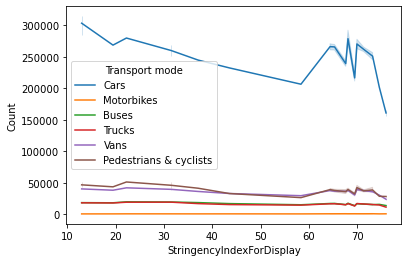

In [64]:
sns.lineplot(
    data=traffic_stringency_airquality, 
    x='StringencyIndexForDisplay',
    y="Count", 
    hue='Transport mode')


<AxesSubplot:xlabel='Date', ylabel='StringencyIndexForDisplay'>

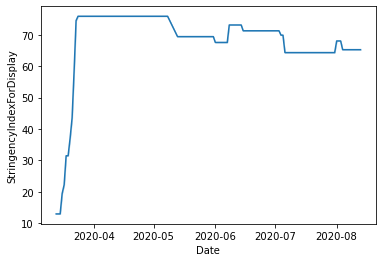

In [65]:
sns.lineplot(
    data=traffic_stringency_airquality, 
    y="StringencyIndexForDisplay",
    x="Date")

In [33]:
# Write to csv
traffic_stringency_airquality.to_csv("Big Data Challenge_ Data and Challenge Statements/Data/Data for analysis/traffic_stringency_airquality.csv") 